# Aritificial intelligence assignment 2024

In [17]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("TensorFlow version:", tf.__version__)

#Alle imports die nodig zijn voor dit notebook

TensorFlow version: 2.10.0


In [18]:
# Parameters
img_height, img_width = 28, 28 
batch_size = 32 

dataset_path = './dataset_short' 

#Hoogte en breedte van het plaatje
#hoeveelheid data die je per keer aan de machine voert
#Pad naar dataset

In [19]:
# Data generators
datagen = ImageDataGenerator(rescale=(1 / 255), validation_split=0.2)


train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    subset='validation'
)
#Afbeeldingen schalen naar een bereik van 255 pixels, dit is de dichtheid van de kleur pixel
#Splitten van de dataset in 20% test data en 80% train data

#Flow from directory leest de mappenstructuur en basseert daarop labels
#class_mode='sparse' houdt in dat de labels integer gecodeerd zijn (A=0, B=1, C=2)
#color_mode='grayscale' is dat de plaatjes zwart wit zijn
#subset geeft een label aan de generator

Found 128 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [20]:
#Model bouwen
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Sequential is een leeg model hier kan stap voor stap lagen aan toegevoegd worden
#Conv2D is een 2D-convolutielaag, dit is een laag die beeldverwerking doet
#Maxpoolings2D verkleint de afbeelding naar setjes van 2x2 pixels en analyseert deze
#Flatten slaat de afbeelding plat naar een 1D abeelding
#Dense voegt 128 neuronen toe in de dense laag
#Compileert het model en voegt optimizer toe

In [21]:
# Model trainen
epochs = 12

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

#Epoch geeft aan hoevaak het model wordt doorlopen

Epoch 1/12
4/4 [==============================] - 1s 116ms/step - loss: 1.3795 - accuracy: 0.3047 - val_loss: 1.3168 - val_accuracy: 0.5000
Epoch 2/12
4/4 [==============================] - 0s 39ms/step - loss: 1.2594 - accuracy: 0.7891 - val_loss: 1.2210 - val_accuracy: 0.6875
Epoch 3/12
4/4 [==============================] - 0s 45ms/step - loss: 1.1127 - accuracy: 0.7656 - val_loss: 1.0757 - val_accuracy: 0.5312
Epoch 4/12
4/4 [==============================] - 0s 39ms/step - loss: 0.9139 - accuracy: 0.8828 - val_loss: 0.8828 - val_accuracy: 0.9062
Epoch 5/12
4/4 [==============================] - 0s 39ms/step - loss: 0.6572 - accuracy: 0.9922 - val_loss: 0.6582 - val_accuracy: 0.9688
Epoch 6/12
4/4 [==============================] - 0s 40ms/step - loss: 0.3953 - accuracy: 0.9922 - val_loss: 0.4322 - val_accuracy: 0.9062
Epoch 7/12
4/4 [==============================] - 0s 38ms/step - loss: 0.1967 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.9062
Epoch 8/12
4/4 [==========

In [22]:
# Model evalueren
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test nauwkeurigheid: {test_accuracy:.4f}")

#evalueert het model, 
#loss geeft aan hoevaak een voorspelling fout was van het model
#Accuracy geeft aan hoeveek de voorspelling klopt

1/1 [==============================] - 0s 63ms/step - loss: 0.1804 - accuracy: 0.9062
Test nauwkeurigheid: 0.9062


In [23]:
# Modelgrootte berekenen
model_size = model.count_params()
model_memory = model_size * 4 / (1024 ** 2)  # 4 bytes per 32-bit float
print(f"Modelgrootte: {model_memory:.2f} MB")

#Het is handig om te weten hoe groot een model is, zo kan je inschatten hoe lang het bezig zal zijn en hoeveel rekenkracht het nodig heeft.

Modelgrootte: 0.86 MB


In [24]:
# Voorspellingen maken en verwarringsmatrix berekenen
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
print("Verwarringsmatrix:")
print(cm)

#De verwarringsmatrix geeft aan hoe vaak een voorspelling is verward met een andere waarde, in ons geval een andere letter

1/1 [==============================] - 0s 125ms/step
Verwarringsmatrix:
[[0 5 1 2]
 [3 1 2 2]
 [5 0 1 2]
 [1 3 3 1]]


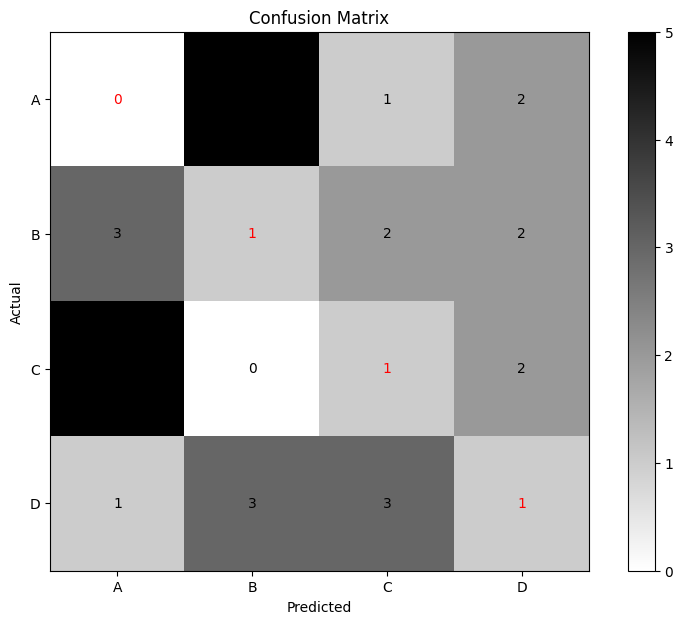

In [25]:
# Functie om cijfers naar letters om te zetten
def number_to_letter(n):
    return chr(n + ord('A'))

# Maak een lijst van letters voor de labels
labels = [number_to_letter(i) for i in range(26)]

# Omzetten naar pandas DataFrame met letters als labels
cm_df = pd.DataFrame(cm, index=labels[:len(np.unique(y_true))], columns=labels[:len(np.unique(y_true))])

# Functie om de celkleur aan te passen
def annotate_heatmap(data, row_labels, col_labels, ax=None,
                     cbar_kw=None, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    cbar_kw = cbar_kw or {}
    im = ax.imshow(data, **kwargs)

    # Markeer de hoofddiagonaal
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color = 'red' if i == j else 'black'
            ax.text(j, i, format(data[i, j], 'd'),
                    ha="center", va="center",
                    color=color)
    
    return im

# Plot de heatmap met aangepaste annotaties
fig, ax = plt.subplots(figsize=(10, 7))
im = annotate_heatmap(cm, labels[:len(np.unique(y_true))], labels[:len(np.unique(y_true))],
                      ax=ax, cmap='binary')

#Zetten van de labels en titel
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Zorg ervoor dat de labels correct worden ingesteld
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(labels[:len(np.unique(y_true))])
ax.set_yticklabels(labels[:len(np.unique(y_true))])

plt.colorbar(im, ax=ax)
plt.show()

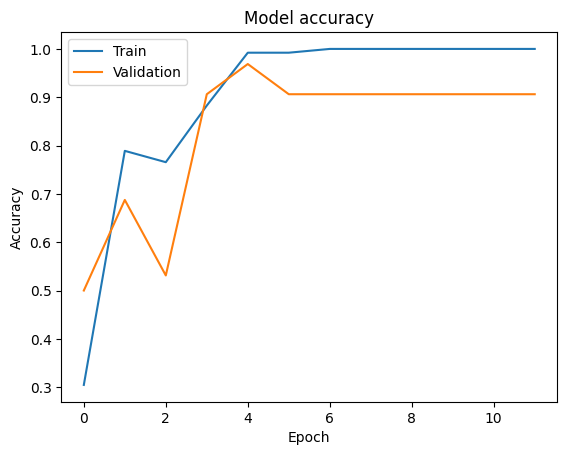

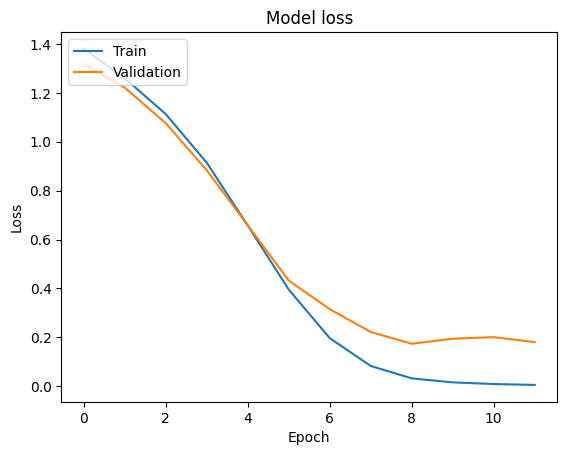

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()